In [3]:
!pip install yfinance==0.2.4
import yfinance as yf

In [6]:
# Extracting Tesla stock data,reseting, saving the data and displaying five rows
tesla_data = yf.download('TSLA', start='2023-01-01', end='2023-06-30')
tesla_data = tesla_data.reset_index()
tesla_data.to_csv('tesla_stock_data.csv', index=False)
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed
                       Date        Open        High         Low       Close  \
0 2023-01-03 00:00:00-05:00  118.470001  118.800003  104.639999  108.099998   
1 2023-01-04 00:00:00-05:00  109.110001  114.589996  107.519997  113.639999   
2 2023-01-05 00:00:00-05:00  110.510002  111.750000  107.160004  110.339996   
3 2023-01-06 00:00:00-05:00  103.000000  114.389999  101.809998  113.059998   
4 2023-01-09 00:00:00-05:00  118.959999  123.519997  117.110001  119.769997   

    Adj Close     Volume  
0  108.099998  231402800  
1  113.639999  180389000  
2  110.339996  157986300  
3  113.059998  220911100  
4  119.769997  190284000  


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', {'class': 'historical_data_table'})
rows = []
for tr in table.find_all('tr')[1:]:  # Exclude the first row (headers)
    row = [td.text for td in tr.find_all('td')]
    if row:
        rows.append(row)
tesla_revenue = pd.DataFrame(rows)
print(tesla_revenue.tail())



       0       1
9   2013  $2,013
10  2012    $413
11  2011    $204
12  2010    $117
13  2009    $112


In [10]:
gme_data = yf.download('GME', start='2023-01-01', end='2023-06-30')
gme_data = gme_data.reset_index()
gme_data.to_csv('gme_stock_data.csv', index=False)
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed
                       Date       Open       High        Low      Close  \
0 2023-01-03 00:00:00-05:00  18.639999  19.260000  17.090000  17.200001   
1 2023-01-04 00:00:00-05:00  17.250000  17.930000  16.900000  17.320000   
2 2023-01-05 00:00:00-05:00  17.059999  17.260000  15.890000  16.219999   
3 2023-01-06 00:00:00-05:00  16.000000  16.570000  15.410000  16.459999   
4 2023-01-09 00:00:00-05:00  16.650000  17.129999  16.360001  16.379999   

   Adj Close   Volume  
0  17.200001  5135200  
1  17.320000  3939300  
2  16.219999  6066200  
3  16.459999  4823400  
4  16.379999  3522600  


In [13]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', {'class': 'historical_data_table'})
rows = []
for tr in table.find_all('tr')[1:]:  # Exclude the first row (headers)
    row = [td.text for td in tr.find_all('td')]
    if row:
        rows.append(row)
gme_revenue = pd.DataFrame(rows)
print(gme_revenue.tail())


       0       1
10  2013  $8,887
11  2012  $9,551
12  2011  $9,474
13  2010  $9,078
14  2009  $8,806


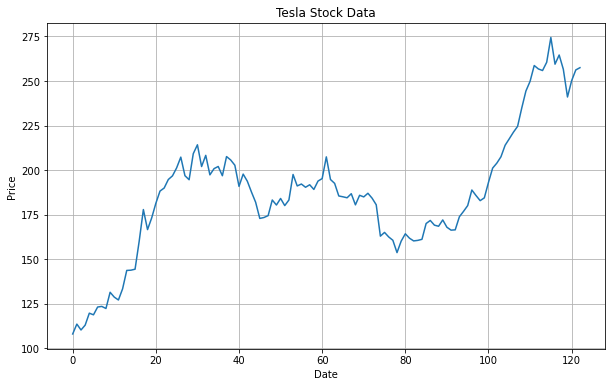

In [31]:
import matplotlib.pyplot as plt
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(title)
    plt.grid(True)
    plt.show()
tesla_data.reset_index(inplace=True)
make_graph(tesla_data, 'Tesla Stock Data')



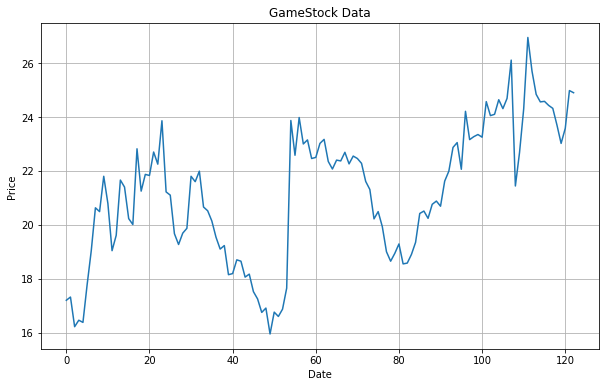

In [32]:
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(title)
    plt.grid(True)
    plt.show()
gme_data.reset_index(inplace=True)
make_graph(gme_data, 'GameStock Data')
